# Polynomial Regression

실생활 데이터들은 선형 보다는 비선형 형태를 띄고 있는 경우가 많습니다. 이럴 경우 선형 모델로는 원하는 성능을 얻을 수 없습니다. 이때는 비선형 데이터를 고차원 함수를 통해 새로운 공간에 맵핑하여 선형 회귀를 이용하는 방법이 많이 쓰입니다.

PolynomialFeatures 함수는 주어인 degree 를 이용하여 입력된 데이터를 새로운 차원으로 맵핑한 결과를 돌려 줍니다. 

In [1]:
# 경고 메시지 출력 끄기
import warnings 
warnings.filterwarnings(action='ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import IPython

import sys

rseed = 22
import random
random.seed(rseed)

import numpy as np
np.random.seed(rseed)
np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float_kind': "{:.3f}".format})

import pandas as pd
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.5f}'.format

import sklearn

print(f"python ver={sys.version}")
print(f"pandas ver={pd.__version__}")
print(f"numpy ver={np.__version__}")
print(f"sklearn ver={sklearn.__version__}")

python ver=3.8.9 (default, Jun 12 2021, 23:47:44) 
[Clang 12.0.5 (clang-1205.0.22.9)]
pandas ver=1.2.4
numpy ver=1.19.5
sklearn ver=0.24.2


In [2]:
from sklearn import preprocessing

X = np.arange(6).reshape(3, 2)
print(X)

poly = preprocessing.PolynomialFeatures(degree=2)
new_X = poly.fit_transform(X)
print(new_X)

[[0 1]
 [2 3]
 [4 5]]
[[1.000 0.000 1.000 0.000 0.000 1.000]
 [1.000 2.000 3.000 4.000 6.000 9.000]
 [1.000 4.000 5.000 16.000 20.000 25.000]]


이는 $[x_1, x_2]$ 변수를 $[1, x_1, x_2, x_1^2, x_1 x_2, x_2^2]$ 2차원 공간으로 맵핑한 전처리 결과입니다. 전처리 후에는 다양한 선형 회귀 함수들을 이용하여 모델을 만드는 것이 가능합니다.

경우에 따라서 고차원 맵핑이 아닌 교차 특징(intersaction features) $[1, x_1, x_2, x_1 x_2]$ 만 필요한 경우는 interaction_only=True 를 사용할 수 있습니다. 예를 들면 XOR 문제를 이 방식으로 선형 회귀를 통해 풀수 있게 됩니다.

In [3]:
from sklearn import linear_model, preprocessing

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] ^ X[:, 1]
print(y)

X = preprocessing.PolynomialFeatures(interaction_only=True).fit_transform(X).astype(int)
print(X)
clf = linear_model.Perceptron(fit_intercept=False, max_iter=10, tol=None, shuffle=False).fit(X, y)

clf.predict(X)
print(clf.score(X, y))

[0 1 1 0]
[[1 0 0 0]
 [1 0 1 0]
 [1 1 0 0]
 [1 1 1 1]]
1.0


data shape: xs=(1000, 1), ys=(1000,)
train shape: train_xs=(700, 1), train_ys=(700,)
test shape: test_xs=(300, 1), test_ys=(300,)


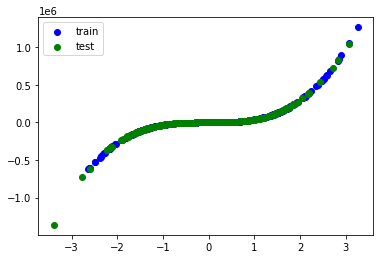


model=LinearRegression()
r_square=0.99987


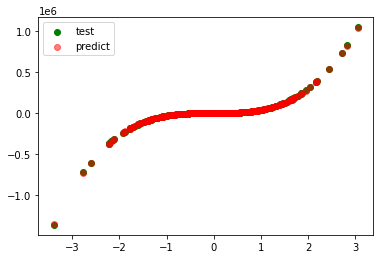

In [4]:
from sklearn import datasets, preprocessing, model_selection, linear_model, metrics

# 데이터
n_samples = 1000
# xs = 2 - 3 * np.random.normal(0, 1, n_samples)
# ys = xs - 2 * (xs ** 2) + 0.5 * (xs ** 3) + np.random.normal(-3, 3, n_samples)
# xs = xs.reshape(-1, 1)
# ys = ys.reshape(-1)
xs, ys = datasets.make_regression(
    n_samples=n_samples, # 데이터 수
    n_features=1, # X feature 수
    bias=1.0, # Y 절편
    noise=0.3, # X 변수들에 더해지는 잡음의 표준 편차
    random_state=rseed) # 난수 발생용 Seed 값
ys = ys**3 # Y 차원
print(f"data shape: xs={xs.shape}, ys={ys.shape}")

train_xs, test_xs, train_ys, test_ys = model_selection.train_test_split(
    xs, ys, test_size=0.3, shuffle=True, random_state=rseed)
print(f"train shape: train_xs={train_xs.shape}, train_ys={train_ys.shape}")
print(f"test shape: test_xs={test_xs.shape}, test_ys={test_ys.shape}")
plt.scatter(train_xs, train_ys, label='train', c='b')
plt.scatter(test_xs, test_ys, label='test', c='g')
plt.legend()
plt.show()

# 전처리
# PolynomialFeature 로 변환
poly = preprocessing.PolynomialFeatures(degree=3)
train_poly_xs = poly.fit_transform(train_xs)
test_poly_xs = poly.transform(test_xs)

# 모델
models = [
    linear_model.LinearRegression()
]

for model in models:
    # 학습
    print(f"\nmodel={model}")
    model.fit(train_poly_xs, train_ys)

    # 평가
    pred_ys = model.predict(test_poly_xs)

    r_square = metrics.r2_score(test_ys, pred_ys)
    print(f"r_square={r_square:.5f}")
    
    plt.scatter(test_xs, test_ys, label='test', c='g')
    plt.scatter(test_xs, pred_ys, label='predict', c='r', alpha=0.5)
    plt.legend()
    plt.show()